# Some theory: normal and t-distributions

## Mean and variance

Before deep diving on these two important distributions, we will focus on the 2 most important descriptive measures of a sample: the mean and the spread
- Mean: it provides information on the center of gravity of the distribution. It is expressed as $\eta = \sum y/N$ where y are the samples and N the number of samples
- Spread: serves to understand how far, on average, data points are from the mean. The most useful is variance expressed as $\sigma = \sqrt{\frac{\sum(y - \eta)^2}{N}}$

Convention
- population attributes are written with greek letters
- sample attributes are written with roman letters

The data available is usually a sample of the population of size n, defined by:
- $\bar{y} = \sum y/n$
- $s = \sqrt{\sum(y - \bar{y})^2 / (n - 1)}$

$\bar{y}$ and s are called sample mean and sample variance.

Important to notice that sample variance s has n-1 in denominator. Why? The reason is subtle but important. By definition of $\bar{y}$, $\sum(y - \bar{y}) = 0$. What this means is that knowing any n - 1 of the $y_i - \bar{y}$ determines the last one since all these variables are linked by one linear relationship $\sum(y - \bar{y}) = 0$. Therefore the last $y_i - \bar{y}$ is not bringing any additional information to the party and does not add value. The information it contains is already contained in the remaining n - 1 elements. Thus we divide by n - 1. The variance $\sigma^2$ is said to have n - 1 degrees of freedom.

In case the population mean is known, the situation changes as we no longer have a linear relationship between the $y_i - \bar{y}$, the sample variance is defined as $\dot{s} = \sqrt{\sum(y - \eta)^2 / n)}$, with the divisor being n, not n - 1. $\dot{s}$ is said to have n degrees of freedom because the n quantities $y - \eta$ are free to vary.

In [1]:
# first some admin stuff
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
import pandas as pd
import numpy as np
import scipy.stats as st
import math
import statistics
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 4]
%config Completer.use_jedi = False
pd.set_option('display.max_rows', 50)

In [2]:
# example
# calculate average and standard deviation for the following data on hog-corn ratios: 16.8, 13.3, 11.8, 15.0, 13.2
df = pd.DataFrame({'ratio': [16.8, 13.3, 11.8, 15.0, 13.2]})
y_bar = df['ratio'].mean(axis=0)
df['ratio_norm'] = df['ratio'] - y_bar
df['ratio_norm_sq'] = df['ratio_norm']**2
s = math.sqrt((1/4) * df['ratio_norm_sq'].sum(axis=0))
df
print('sample mean is {:.2f}'.format(y_bar))
print('standard deviation is {:.3f}'.format(s))
print('there are 4 degrees of freedom')

sample mean is 14.02
standard deviation is 1.924
there are 4 degrees of freedom


## The normal distribution

This distribution whose probability density function is $f(x) = \frac{1}{\sigma}e^{-[(y - \eta)^2/2\sigma^2]}$ is very important due to the central limit theorem and the robustness of many statistical procedures to deviation from theoretical normality.

Let's plot the curve first.

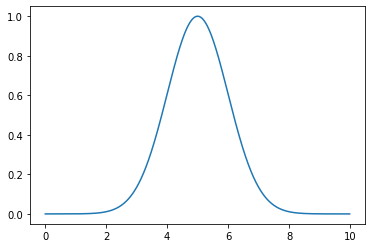

In [3]:
x = np.arange(0,10,0.01)
m = 5
sig = 1
norm = lambda x: (1/sig)*np.exp(-((x - m)**2)/(2*sig**2))
y = [norm(i) for i in x]
plt.plot(x,y)

### Central limit theorem

This theorem says that the distribution sample mean converges to a normal distribution as the number of samples increases, regardless of the population distribution

In [4]:
# creates a sample
population_size = 1000
a_1_die = pd.Series(np.random.randint(1,7,size=population_size))
a_2_dice = [a_1_die.sample(2).mean() for i in range(population_size)]
a_3_dice = [a_1_die.sample(3).mean() for i in range(population_size)]
a_4_dice = [a_1_die.sample(4).mean() for i in range(population_size)]
a_5_dice = [a_1_die.sample(5).mean() for i in range(population_size)]
a_6_dice = [a_1_die.sample(6).mean() for i in range(population_size)]
df4 = pd.DataFrame({'1 die':a_1_die,'2 dice':a_2_dice,'3 dice':a_3_dice,'4 dice':a_4_dice,'5 dice':a_5_dice,'6 dice':a_6_dice})
df4

,1 die,2 dice,3 dice,4 dice,5 dice,6 dice
0,2,2.5,2.666667,2.75,3.2,2.000000
1,6,4.0,2.333333,4.00,3.8,4.500000
2,2,4.5,5.666667,3.00,4.2,3.666667
3,6,5.0,3.666667,3.75,3.2,4.333333
4,5,5.0,4.333333,4.00,3.6,3.166667
...,...,...,...,...,...,...
995,1,3.0,3.333333,3.00,4.2,4.000000
996,4,5.0,3.666667,3.75,3.2,3.000000
997,2,3.0,4.333333,2.75,4.0,3.666667
998,5,4.0,4.000000,4.25,4.6,3.000000


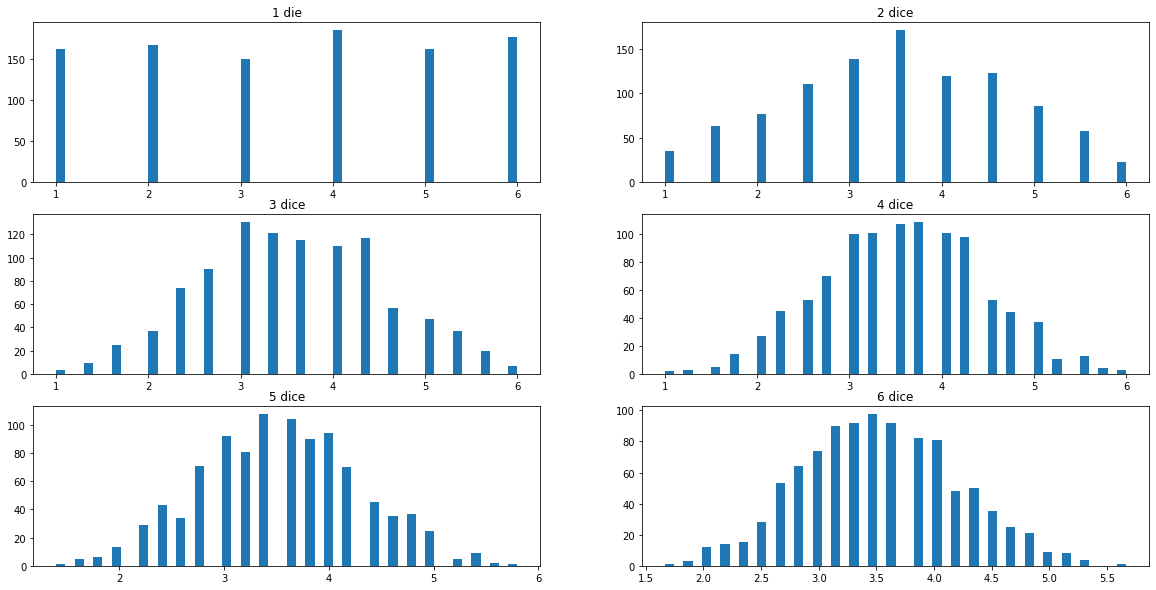

In [5]:
fig, axes = plt.subplots(3,2,figsize=(20,10))
count = 0
for i in range(3):
    for j in range (2):        
        axes[i,j].hist(df4.iloc[:,count], bins = 50)
        axes[i,j].set_title(df4.columns[count])
        count += 1

We can see that the distribution evolves from uniform to normal as we increase the sample size, i.e. take the average of more dice

The consequence is that real error distributions tend to be normally distributed as they can usually be modeled as a linear combination of many small component error (measurement error, reading error, calculation, sampling, etc.)

### Computing z score and probability values

Since the normal distribution and curve is so prevalent, it is very common to normalize it to make it comparable to an absolute reference: a normal curve of mean 0 and variance 1. It is done by computing the z-score of a value, which is the number of standard deviation that a point is away from the mean. 

Z score is defined as $z = \frac{y - \eta}{\sigma}$

In [6]:
# for random variable having a normal distribution with mean 𝜂 = 6 and standard deviation 𝜎 = 2,
# what is the probability that an individual observation selected at random will be between 5 and 7? 

z_5 = (5-6)/2
z_7 = (7-6)/2
p_lt5 = st.norm.cdf(5,loc=6,scale=2) 
p_lt7 = st.norm.cdf(7,loc=6,scale=2) 
dist = st.norm.cdf(7,loc=6,scale=2) - st.norm.cdf(5,loc=6,scale=2)
print('z score of 5 is {:.02f}\nz score of 7 is {:.02f}\nprobability that x < 5 is {:.02f}\nprobability that x < 7 is {:.02f}\nprobability that 5 < x < 7 is {:.02f}\n'.format(z_5,z_7,p_lt5,p_lt7,dist))

z score of 5 is -0.50
z score of 7 is 0.50
probability that x < 5 is 0.31
probability that x < 7 is 0.69
probability that 5 < x < 7 is 0.38



## Student's t distribution

When we do not know the population standard's deviation $\sigma$, we cannot calculate the z value and make a statement about the random occurence of this value using the normal distribution of z. 

Instead we compute a new metric $t = \frac{y - \eta}{s}$ where s is the standard deviation of the sample (different from $\sigma$ which is standard deviation of the population!!).

It can be shown that t follows a known distribution known as t distribution. It was deduced by Gosset who went by pseudonym of Student.

The t distribution resembles the normal distribution but with fatter tails. The intuition isthe following:
- as the number of samples increases, the uncertainty around s decreases as it gets closer to $\sigma$ and the curve converges to normal distribution
- as the number of samples decreases, the uncertainty around s increases (example: sample could be made of 3 adjacent numbers giving false impression of small variance whereas the population has much larger variance, this is harder to do when we have 30 samples as the sample will very likely resemble more the population). There is greater probability of extreme variation of s (small) and t (large) and thus the fatter tails observed

The degree of uncertainty is measured by the number of degrees of freedom $\nu$ = number of samples - 1

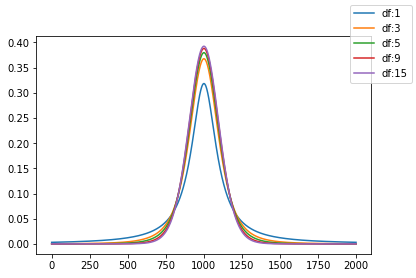

In [16]:
x = np.arange(-10,10,0.01)
nu = [1,3,5,9,15]
fig2, ax = plt.subplots(1)
for i in nu:
    y = st.t.pdf(x,df=i)
    ax.plot(y,label='df:{}'.format(i))
fig2.legend()

As you can see, the higher the degree of freedom, the more the curve looks like a normal distribution. 
The lower the degree of freedom, the fatter the tails are, reflecting the higher uncertainty about s and more extreme values of t statistics

In [27]:
# application exercise
# performance y, in miles per gallon, of a sample of cars all of the same make and age: 27.8, 24.3, 22.8, 26.0, 24.2
# 1 - calculate variance knowing 𝜂 = 25
# 2 - calculate variance assuming 𝜂 is unknown
# 3 - measure performance for single car of different manufacturer but similar in size to others is 28.2. 
# Use t statistic to test the null hypothesis that this difference of manufacturer is without effect

In [56]:
df = pd.DataFrame([27.8, 24.3, 22.8, 26.0, 24.2], columns=['raw'])
df['mean sq'] = (df['raw'] - 25)**2
s_ds = (1/5)*df['mean sq'].sum()
df['sample mean sq'] = (df['raw'] - df['raw'].mean(axis=0))**2
s_s = (1/4)*df['sample mean sq'].sum()
print('s_ds:{:.02f} with 5 degrees of freedom\ns_s:{:.02f} with 4 degrees of freedom'.format(s_ds,s_s))
t_d = (28.2-25)/math.sqrt(s_ds)
t = (28.2-25)/math.sqrt(s_s)
st.t.cdf((28.2-25)/s_ds,df=5,loc=0,scale=1)
print('t_d:{:.02f} with 5 degrees of freedom\nt:{:.02f} with 4 degrees of freedom'.format(t_d,t))
print('probability to exceed t_d is {:.02f}'.format(1 - st.t.cdf(t_d,df=5,loc=0, scale=1)))
print('probability to exceed t is {:.02f}'.format(1 - st.t.cdf(t,df=4,loc=0, scale=1)))

s_ds:2.96 with 5 degrees of freedom
s_s:3.70 with 4 degrees of freedom
t_d:1.86 with 5 degrees of freedom
t:1.66 with 4 degrees of freedom
probability to exceed t_d is 0.06
probability to exceed t is 0.09


We do not see reason to reject the null hypothesis